<a href="https://colab.research.google.com/github/BHANAPEESHAN/Projects/blob/main/Linear_Regression_on_Health_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
df=pd.read_excel("/content/Statistical Survey Assessment (Responses).xlsx")

In [2]:
df

,GR Number,Branch,Gender,Division,Height,Weight,CGPA FY,SGPA SY,Calculate BMI,Number of College Clubs/Cells you are a part of
0,22010707,Computer Science,M,D,172.0000,50,9.75,9.08,NaN,0
1,22010739,Computer Science,F,B,153.0000,43,9.7,10,NaN,"Cec, rc bharatvarsh"
2,22010824,Computer Science,M,B,177.0000,68,9.7,9.8,NaN,1
3,22010364,Computer Science,M,A,165.0000,55,10,9.71,NaN,0
4,22010300,Computer Science,F,A,167.6400,60.5,10,10,NaN,1
...,...,...,...,...,...,...,...,...,...,...
267,22120240,Mechanical Engineering,F,B,159.1000,47.5,Null,Null,NaN,1 (Vishwa racers)
268,22010026,Information Technology,M,C,177.0000,69,8.86,9.05,NaN,1
269,22120009,Computer Science,M,B,155.7528,65,84.8,96.7,NaN,0
270,22010677,Computer Science,F,A,151.0000,47,9.8,9.8,NaN,No


In [3]:
df.columns

Index(['GR Number', 'Branch', 'Gender', 'Division', 'Height', 'Weight',
       'CGPA FY', 'SGPA SY', 'Calculate BMI',
       'Number of College Clubs/Cells you are a part of'],
      dtype='object')

In [4]:
df_new=df.drop(['CGPA FY','SGPA SY',
       'Number of College Clubs/Cells you are a part of','Branch', 'Division'],axis=1)

In [5]:
df_new.shape

(272, 5)

In [6]:
df_new

,GR Number,Gender,Height,Weight,Calculate BMI
0,22010707,M,172.0000,50,NaN
1,22010739,F,153.0000,43,NaN
2,22010824,M,177.0000,68,NaN
3,22010364,M,165.0000,55,NaN
4,22010300,F,167.6400,60.5,NaN
...,...,...,...,...,...
267,22120240,F,159.1000,47.5,NaN
268,22010026,M,177.0000,69,NaN
269,22120009,M,155.7528,65,NaN
270,22010677,F,151.0000,47,NaN


In [7]:
df_new.dtypes

GR Number          int64
Gender            object
Height           float64
Weight            object
Calculate BMI    float64
dtype: object

In [8]:
df_new["Weight"] = [float(str(i).replace("'s", "")) for i in df["Weight"]]

In [9]:
df_new['Weight'] = df_new['Weight'].astype(int)

In [10]:
df_new['Height'] = df_new['Height'].astype(int)

In [11]:
df_new= df_new.drop(['Calculate BMI'],axis=1)

In [12]:
df_new

,GR Number,Gender,Height,Weight
0,22010707,M,172,50
1,22010739,F,153,43
2,22010824,M,177,68
3,22010364,M,165,55
4,22010300,F,167,60
...,...,...,...,...
267,22120240,F,159,47
268,22010026,M,177,69
269,22120009,M,155,65
270,22010677,F,151,47


In [13]:
df_new.dtypes

GR Number     int64
Gender       object
Height        int64
Weight        int64
dtype: object

In [14]:
df_new.isna().sum()

GR Number    0
Gender       0
Height       0
Weight       0
dtype: int64

In [15]:
df_new['BMI'] = df_new['Weight']/((df_new['Height']/100)**2)

In [16]:
df_new

,GR Number,Gender,Height,Weight,BMI
0,22010707,M,172,50,16.901028
1,22010739,F,153,43,18.369003
2,22010824,M,177,68,21.705129
3,22010364,M,165,55,20.202020
4,22010300,F,167,60,21.513859
...,...,...,...,...,...
267,22120240,F,159,47,18.591037
268,22010026,M,177,69,22.024323
269,22120009,M,155,65,27.055151
270,22010677,F,151,47,20.613131


In [17]:
df_final=df_new.drop(['GR Number'],axis=1)

In [18]:
df_final

,Gender,Height,Weight,BMI
0,M,172,50,16.901028
1,F,153,43,18.369003
2,M,177,68,21.705129
3,M,165,55,20.202020
4,F,167,60,21.513859
...,...,...,...,...
267,F,159,47,18.591037
268,M,177,69,22.024323
269,M,155,65,27.055151
270,F,151,47,20.613131


In [19]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [20]:
sns.__version__

'0.11.2'

In [21]:
df_final.dtypes

Gender     object
Height      int64
Weight      int64
BMI       float64
dtype: object

In [22]:
df_final.describe()

,Height,Weight,BMI
count,272.000000,272.000000,272.000000
mean,169.415441,62.930147,137.344649
std,17.221163,12.612545,1751.953317
min,5.000000,36.000000,14.002661
25%,165.000000,54.000000,18.921747
50%,172.000000,62.500000,21.419612
75%,178.000000,70.000000,23.830026
max,207.000000,103.000000,28800.000000


In [23]:
df_final['BMI'] = df_final['BMI'].astype(float)

In [24]:
df_final.dtypes

Gender     object
Height      int64
Weight      int64
BMI       float64
dtype: object

In [25]:

def convert_status_to_description(df_final):
  for i in range(0, len(df_final)):
    
    if df_final['BMI'] < 18.5:
      print(df_final['BMI'])
      return 1
    elif (df_final['BMI'] >= 18.5) and (df_final['BMI'] <24.9):
      return 2
    elif (df_final['BMI'] >= 24.9) and (df_final['BMI'] <29.9):
      return 3
    elif (df_final['BMI'] >= 29.9) and (df_final['BMI'] <34.9):
      return 4
    elif (df_final['BMI'] >= 34.9) and (df_final['BMI'] <39.9):
      return 5
    elif (df_final['BMI'] >= 39.9):
      return 6
    

#print(convert_status_to_description)
df_final['Status'] = df_final.apply(convert_status_to_description,axis=1)
df_final.head()
  

16.901027582477017
18.369003374770386
18.080210387902692
16.41206918318394
16.203078584931134
16.184274906846326
14.843749999999996
17.632653061224488
15.243902439024392
16.528925619834713
17.75568181818182
15.605006085952374
14.002660505496046
17.87481247406556
18.314459265590184
18.413907181423802
17.82322863403944
15.405623052414134
15.173037190082646
17.85062274331616
14.850206611570249
16.037956497043
17.577068685776098
16.224986479177936
16.649323621227886
18.285714285714285
16.141528925619834
16.975308641975307
14.363393864778908
15.581717451523545
18.289894833104707
16.866250632484398
15.495867768595042
15.094795314575533
18.369003374770386
16.666666666666664
16.901027582477017
17.477606816266658
16.604274846033086
16.302378939741576
14.692378328741967
17.301038062283737
17.99816345270891
16.975308641975307
17.577068685776098
18.02595737862522
17.59259259259259
16.60899653979239
16.023073225444637
16.70620468441979
17.43285123966942
16.54730902777778
18.30576947355132
18.113754

,Gender,Height,Weight,BMI,Status
0,M,172,50,16.901028,1
1,F,153,43,18.369003,1
2,M,177,68,21.705129,2
3,M,165,55,20.202020,2
4,F,167,60,21.513859,2


In [26]:
def convert_gender_to_label(df_final):
    for i in range(len(df_final)):
      if df_final['Gender'] == 'M':
          return 1
      elif df_final['Gender'] == 'F':
          return 0
df_final['gender_lbl'] = df_final.apply(convert_gender_to_label,axis=1)
df_final.head()

,Gender,Height,Weight,BMI,Status,gender_lbl
0,M,172,50,16.901028,1,1
1,F,153,43,18.369003,1,0
2,M,177,68,21.705129,2,1
3,M,165,55,20.202020,2,1
4,F,167,60,21.513859,2,0


In [27]:
#or i in range(5):
# if df_final['BMI'][i] < 18.5:
#   print("weak\n")
# elif (df_final['BMI'][i] >= 18.5) and (df_final['BMI'][i] <24.9):
#   print('Underweight\n')

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


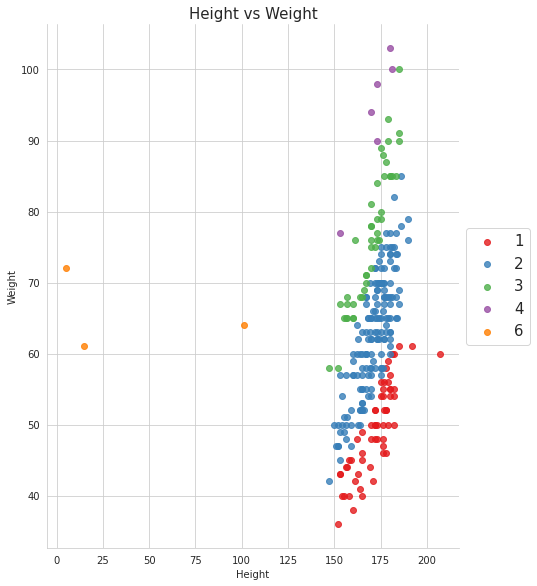

In [28]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=df_final, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

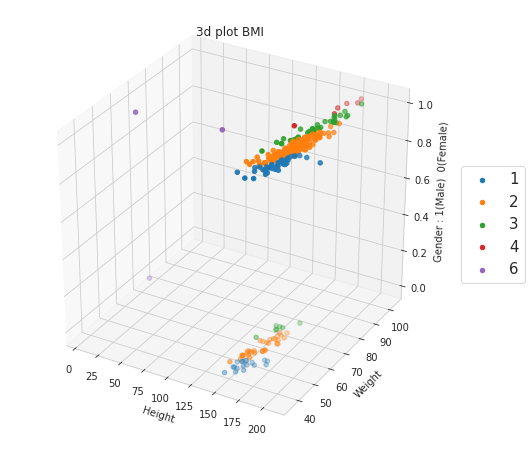

In [29]:
groups = df_final.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(data_visual['Height'],data_visual['Weight'] , data_visual['gender_lbl'], 
#            c=data_visual['Index'],
#            cmap=matplotlib.colors.ListedColormap(colors))


for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('3d plot BMI')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

In [30]:
people = df_final['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


M    214
F     58
Name: Gender, dtype: int64

In [31]:
categories = df_final['Status'].value_counts() 
categories

2    159
1     59
3     45
4      6
6      3
Name: Status, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
lbl_enc = LabelEncoder()
df_final.iloc[:,0] = lbl_enc.fit_transform(df_final.iloc[:,0])
one_hot_enc_for_gender = OneHotEncoder(categories = [0])
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   
    remainder='passthrough'                                         
)
df_final = ct.fit_transform(df_final)


In [33]:
df_e = pd.DataFrame(df_final)
df_e.head()

,0,1,2,3,4,5,6
0,0.0,1.0,172.0,50.0,16.901028,1.0,1.0
1,1.0,0.0,153.0,43.0,18.369003,1.0,0.0
2,0.0,1.0,177.0,68.0,21.705129,2.0,1.0
3,0.0,1.0,165.0,55.0,20.202020,2.0,1.0
4,1.0,0.0,167.0,60.0,21.513859,2.0,0.0


In [34]:
df_encoded=df_e.drop([6],axis=1)

In [35]:
df_encoded

,0,1,2,3,4,5
0,0.0,1.0,172.0,50.0,16.901028,1.0
1,1.0,0.0,153.0,43.0,18.369003,1.0
2,0.0,1.0,177.0,68.0,21.705129,2.0
3,0.0,1.0,165.0,55.0,20.202020,2.0
4,1.0,0.0,167.0,60.0,21.513859,2.0
...,...,...,...,...,...,...
267,1.0,0.0,159.0,47.0,18.591037,2.0
268,0.0,1.0,177.0,69.0,22.024323,2.0
269,0.0,1.0,155.0,65.0,27.055151,3.0
270,1.0,0.0,151.0,47.0,20.613131,2.0


In [36]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
df_encoded.iloc[:,0:-1] = std_sc.fit_transform(df_encoded.iloc[:,0:-1])

In [37]:
df_encoded.head()

,0,1,2,3,4,5
0,-0.520604,0.520604,0.150357,-1.027071,-0.068875,1.0
1,1.920848,-1.920848,-0.954970,-1.583097,-0.068035,1.0
2,-0.520604,0.520604,0.441233,0.402710,-0.066128,2.0
3,-0.520604,0.520604,-0.256869,-0.629910,-0.066987,2.0
4,1.920848,-1.920848,-0.140519,-0.232748,-0.066237,2.0


In [38]:
X = df_encoded.iloc[:,:-1]
y = df_encoded.iloc[:,-1]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [40]:
print(type(X_train))
X_train.head() 

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4
184,-0.520604,0.520604,0.034007,-1.027071,-0.068646
134,1.920848,-1.920848,-0.256869,-0.788774,-0.067407
263,-0.520604,0.520604,-0.256869,-1.344800,-0.068878
5,-0.520604,0.520604,-0.024168,0.005549,-0.065926
22,-0.520604,0.520604,0.208532,2.785679,-0.059815


In [50]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Accuracy: ",regr.score(X_test, y_test)*100)

Accuracy:  80.93938889712126


In [51]:
y_pred_lr = regr.predict(X_test)

In [59]:
import math
import sklearn.metrics as metrics
#check of MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred_lr)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.08292153458310225
Root Mean Squared Error : 0.28796099489879223
